In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date']=pd.DatetimeIndex(data=df['date'])
df = df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df[
    (df['value']>= df['value'].quantile(0.025)) &
    (df['value']<= df['value'].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Dates', ylabel='Page Views'>

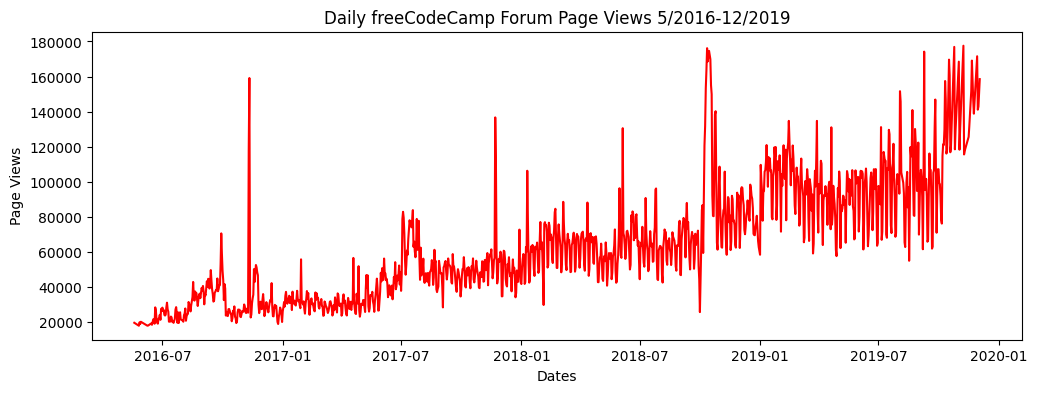

In [5]:


g = sns.lineplot(data=df,x=df.index,y='value')
g.figure.set_size_inches(12,4)
g.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
g.set_xlabel('Dates')
g.set_ylabel('Page Views')
g.lines[0].set_color('red')
'''plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) ---> no use'''
g

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [6]:
df_bar=df.resample('ME').mean().round()
df_bar.reset_index(inplace=True)
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]
#df_bar['month'] = df_bar.month.astype(str)
df_bar['year'] = [d.year for d in df_bar.date]
#df_bar['year'] = df_bar.year.astype(int)
#df_bar=pd.melt(df_bar,value_vars=['year','month'])

'''
df_bar.index =df_bar.index.strftime(date_format='%B-%Y')
df_bar['Month']=df_bar.index
df_bar['year'] =df_bar.index
df_bar['Month']= pd.to_datetime(df_bar['Month']).dt.month_name()
df_bar['year']=pd.to_datetime(df_bar['year']).dt.year
'''
df_bar


,date,value,month,year
0,2016-05-31,19432.0,May,2016
1,2016-06-30,21875.0,June,2016
2,2016-07-31,24110.0,July,2016
3,2016-08-31,31049.0,August,2016
4,2016-09-30,41477.0,September,2016
5,2016-10-31,27398.0,October,2016
6,2016-11-30,40449.0,November,2016
7,2016-12-31,27832.0,December,2016
8,2017-01-31,32785.0,January,2017
9,2017-02-28,31113.0,February,2017


In [7]:
df_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    44 non-null     datetime64[ns]
 1   value   44 non-null     float64       
 2   month   44 non-null     object        
 3   year    44 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [8]:
month=['January',
       'February',
       'March',
       'April',
       'May',
       'June',
       'July',
       'August',
       'September',
       'October',
       'November',
       'December']

<Axes: xlabel='Years', ylabel='Average Page Views'>

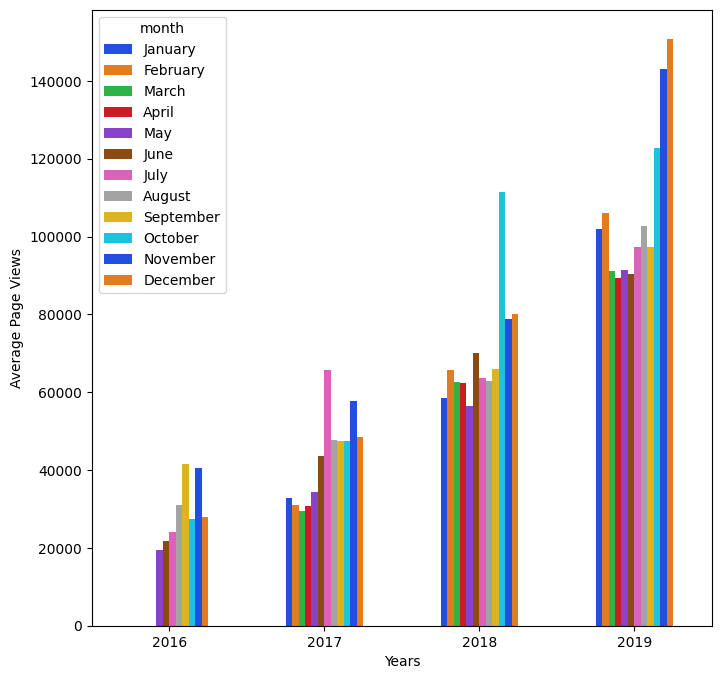

In [9]:
h = sns.barplot(
    data=df_bar,
    x='year',
    y='value',
    hue='month',
    hue_order=month,
    palette='bright',
    width=0.5,
    legend=month
    )
h.figure.set_size_inches(8,8)
h.set_ylabel('Average Page Views')
h.set_xlabel('Years')

h

In [10]:
test=pd.array(h.get_legend().get_texts())
test


<NumpyExtensionArray>
[  Text(0, 0, 'January'),  Text(0, 0, 'February'),     Text(0, 0, 'March'),
     Text(0, 0, 'April'),       Text(0, 0, 'May'),      Text(0, 0, 'June'),
      Text(0, 0, 'July'),    Text(0, 0, 'August'), Text(0, 0, 'September'),
   Text(0, 0, 'October'),  Text(0, 0, 'November'),  Text(0, 0, 'December')]
Length: 12, dtype: object

In [11]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


C:\Users\kimct\AppData\Local\Temp\ipykernel_3808\1204393703.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\kimct\AppData\Local\Temp\ipykernel_3808\1204393703.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

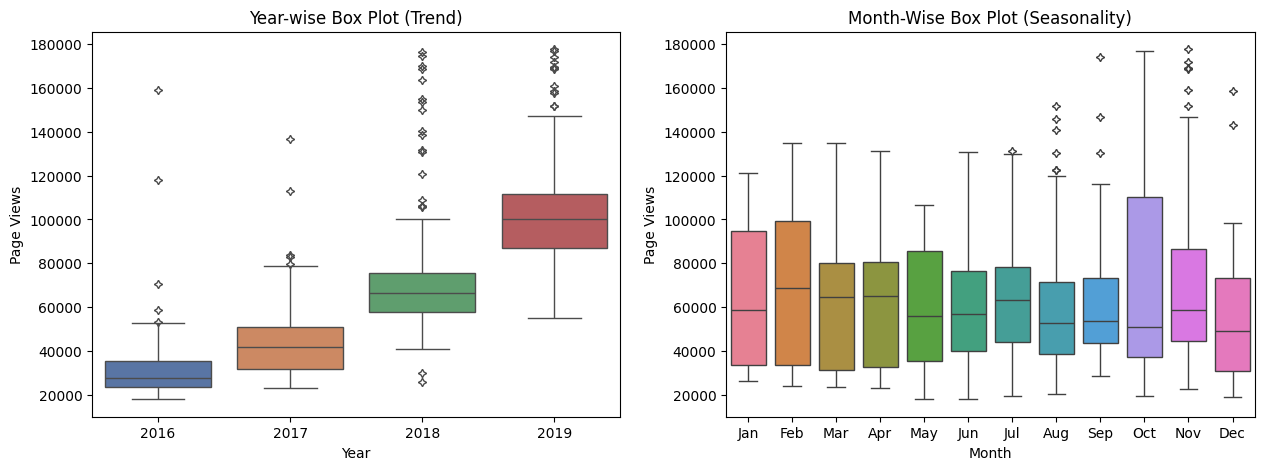

In [62]:
month_short=[
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
    ]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(
    data=df_box,
    x='year',
    y='value',
    palette='deep',
    flierprops={"marker": (4,1,0)},
    ax=axes[0]  
)
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

color_barmonth=sns.color_palette('husl',12) 
sns.boxplot(
    data=df_box,
    x='month',
    y='value',
    palette=color_barmonth,
    order=month_short,
    flierprops={"marker": (4,1,0)},
    ax=axes[1]  
)
axes[1].set_title('Month-Wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
plt.tight_layout
